In [1]:
%matplotlib inline
from __future__ import print_function

from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

import numpy as np
import pandas as pd

%load_ext autoreload
%autoreload 2
 
import importlib
import pickle
from utils.result_utils import *
root = '/Users/thorey/Documents/project/competition/fognet/models/clavius/lstm'

In [13]:
from utils.data_utils import *

In [15]:
data = load_raw_data()
train = data['microclimat_train']
test = data['microclimat_test']
sub = data['submission_format']
df = train.append(sub.join(test,how='left'))
df_tmp = pd.DataFrame(index=pd.date_range(start=df.index.min(),end=df.index.max(),freq='2H')).join(df,how='left')

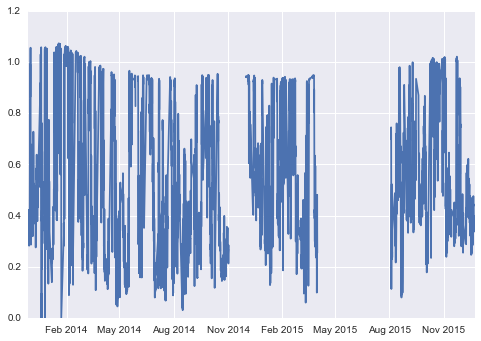

In [28]:
plt.plot(train.humidity)

In [18]:
set(add_group_column_to_data(df_tmp).group)

{'group0'}

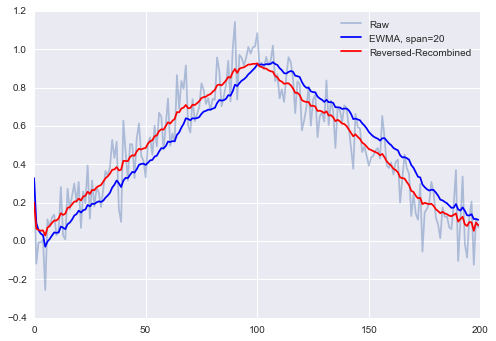

In [7]:
import pandas, numpy as np
ewma = pandas.stats.moments.ewma

# make a hat function, and add noise
x = np.linspace(0,1,100)
x = np.hstack((x,x[::-1]))
x += np.random.normal( loc=0, scale=0.1, size=200 )
plt.plot( x, alpha=0.4, label='Raw' )

# take EWMA in both directions with a smaller span term
fwd = ewma( x, span=15 )          # take EWMA in fwd direction
bwd = ewma( x[::-1], span=15 )    # take EWMA in bwd direction
c = np.vstack(( fwd, bwd[::-1] )) # lump fwd and bwd together
c = np.mean( c, axis=0 )          # average  

# regular EWMA, with bias against trend
plt.plot( ewma( x, span=20 ), 'b', label='EWMA, span=20' )

# "corrected" (?) EWMA
plt.plot( c, 'r', label='Reversed-Recombined' )
plt.legend()

In [12]:
fwd = ewma?

In [ ]:
fwd = ewma

In [ ]:
plt.scatter(df_tmp.index,df_tmp.interpolate(method='cubic').humidity)

In [188]:
df.interpolate?

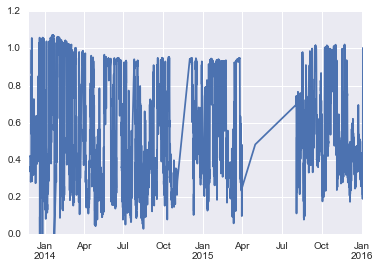

In [181]:
df_tmp.interpolate(method='time').humidity.plot()